# Example 1: The `mm2SANS` `Sample` class

This example describes the initialisation of a `Sample` object.

In this case the sample consists of a single spherical Fe magnetic particle magnetised along $x$.

## Things you can do with a `Sample` object

In addition the position $\vec{r}_i$ of the individual scatters (which are assumed to be spherical), you can define either global material properties or specific values _for each position_ for the following quantities:

- The volumes $V_i$ of each point. Alternatively, give a scalar value values for all positions (e.g. for input from finite-difference simulations) or let the program calculate the point value automatically (works only for more than three non-collinear positions). This option might be particularly useful for input from finite-elements simulations, which use a non-uniform mesh. The volume is used to calculate the net moment as well as the form factor of the scatterers.
- The scattering length density $\rho_i$. This is useful to calculate scattering patterns for samples combining different materials (whether they are magnetic or not).
- Position-dependent magnetic moment $\vec{m}_i$ (respectively their normalised direction, as this is the typical output from micromagnetic simulations). Alternatively, you can give a single vector if the sample is uniformly magnetised. The standard value is `None`, which specifies a non-magnetic sample.
- Position-dependent saturation magnetisation $M^\text{sat}_i$. This could be useful for samples combining different magnetic or magnetic and nonmagnetic materials. From the values of $\vec{m}_i$, $M^\text{sat}_i$ and $V_i$ the moment per site in multiples of $\mu_B$ is calculated.

In [1]:
import mm2SANS
import numpy as np

In [2]:
""" structural properties """

# list of position vectors, in units of meter
positions = [[0, 0, 0]]

# scalar or list of scatterer radius
# if not explicitly provided: 
    # pairwise distances will be calculated.
    # if less than three non-collinear scatterers are given, a standard radius of 2 nm is set
radius = 10e-9

# structural scattering length density (SLD), best looked up using the package periodictable
# https://periodictable.readthedocs.io/en/latest/api/nsf.html
# SLD value for iron at 7.874 g/cm^3 and 8 Angstrom neutron wavelength
sld_material = (8.024-0.001j) # in 1e6 Angstrom^{-2}

""" magnetic properties """

# specify magnetic moments: 
    # None (non-magnetic sample), single 3-vector (uniform magnetisation) or list of vectors
# micromagnetic simulations usually 
moments = [[1, 0, 0]]

# saturation magnetisation, to calculate the moment of each volume in multiples of mu_Bohr
# set to 1 if the 
M_sat = 800e3 # in A/m

""" periodic repetitions of the structure """

# periodicity of structure, in m
periodicity = (50e-9, 50e-9, 50e-9)

In [3]:
""" create the Sample object """

Sample = mm2SANS.Sample(
    # neccessary properties
    positions=positions,
    # optional properties
    moments=moments,
    scattering_length_density=sld_material,
    saturation_magnetisation=M_sat,
    voxel_volumes= 4/3 * np.pi * radius**3 ,
    periodicity=periodicity,
    # additional settings
    volume_correction=None, # None or provide filling factor or provide net volume
    number_of_unit_cells=1,
    print_diagnostics=True,
    )

Data bounding box size: (0.0, 0.0, 0.0) nm.
REMARK: Voxel volumes were not corrected.
1 positions with an average sphere diameter of 20.00 nm, and an average moment of 1.2e+05 mu_Bohr.


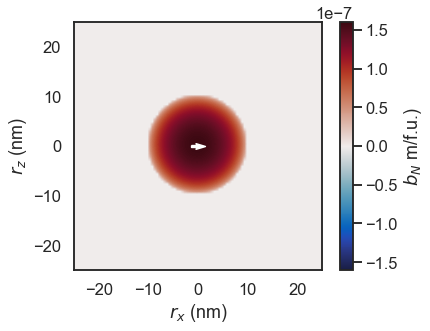

In [4]:
""" plot the projected scattering length density in real space"""

# the step size determines the pixel resolution of the image (in m)
Sample.plot_scattering_length(plane='xz', step_size=0.5e-9, show_magnetic=True)

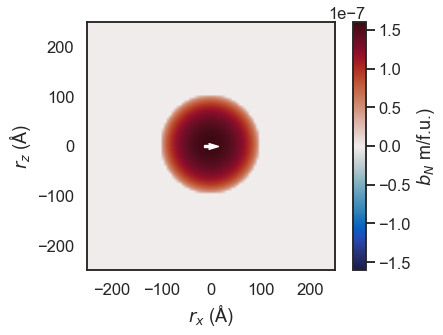

In [5]:
# same, but with base unit in Angstrom
Sample.plot_scattering_length(plane='xz', step_size=0.5e-9, show_magnetic=True, r_unit='Angstrom')